# AIN313 - Machine Learning Lab.

**Assignment 1**

**Diesase Detection on X-Ray Images**

**Instructor: **Erkut Erdem

**TA:** Sibel Kapan


## Student Information


Name Surname: Sare Naz ERSOY

Student ID: 21992957

# PART II: Disease Detection from X-Ray Images
##  INTRODUCTION
In this part of the assignment, I will implement normal nearest neighbor algorithm and weigted nearest neighbor algorithm to detect diseases from chest X-Ray images of people.


• The training set contains 1000 images for each class, and the test set contains 100 images for each class. 

• The X-Ray images in the dataset may have various height and width values, so I will resize them to same specific height and width values firstly before using KNN algorithms on them.


Features

I need to use at least two feature that I think it’s proper for my disease detection assignment. I will be choosing Noice Reduction Filtering and Gabor Filtering for this dataset.

I will also be seeing the affect of different k values, different filter parameters on accuracy and time consumed.

# Coding Part

In [1]:
# importing the necessary packages
!pip install opencv-python

In [2]:
#Doing the necessary imports
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import argparse
import os
import csv
import cv2
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Folder reader function
def readfolder(folder):
    folderdata = []
    for images in os.listdir(folder):
     
        # check if the image ends with png
        if (images.endswith(".jpg")):
            folderdata.append(os.path.join(folder,images))
            
    return folderdata

In [4]:
#Here I read the folders seperately for the probability that I need them later.
testCovid1 = readfolder("chest_xray/test/covid")
testPn1 = readfolder("chest_xray/test/pneumonia")
testNorm1 = readfolder("chest_xray/test/normal")
trainCovid1 = readfolder("chest_xray/train/covid")
trainPn1 = readfolder("chest_xray/train/pneumonia")
trainNorm1 = readfolder("chest_xray/train/normal")

In [5]:
trainAllstr = []
testAllstr = []
trainAll = []
testAll = []
#Here I resized the data to 32x32 and add them two list. One for normal use and one for labeled data.
for i in testCovid1:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"covid"])
for i in testPn1:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"pn"])
for i in testNorm1:
    x=cv2.resize(cv2.imread(i),(32,32))
    testAll.append(x)
    testAllstr.append([x,"normal"])
for i in trainCovid1:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"covid"])
for i in trainPn1:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"pn"])
for i in trainNorm1:
    x=cv2.resize(cv2.imread(i),(32,32))
    trainAll.append(x)
    trainAllstr.append([x,"normal"])

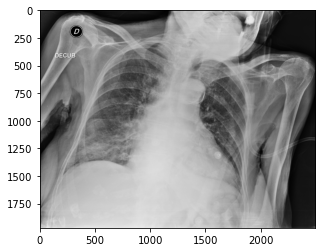

In [6]:
plt.imshow(cv2.imread(testCovid1[0])) #example of original version of first test/covid image

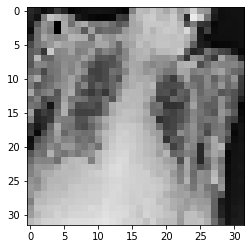

In [7]:
plt.imshow(testAll[0]) #example of resized version of the image

##### KNN

In [8]:
#This is the distance finder function between two images
def findDistanceofImages(img1,img2): #finds L1 distance
    distance = np.sum(np.abs(img1-img2))
    return distance

In [9]:
#This is rest of my K-NN function.
def Get_Neighbors(train, test, num,trainAllstr):
    distance = list()
    data = []
    kind = []
    for i in train:
        dist = findDistanceofImages(test, i)
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    index_dist = distance.argsort()
    data = data[index_dist]
    neighbors = data[:num]
   
    for i in neighbors:
        for j in trainAllstr:
            if (i==j[0]).all():
                kind.append(j[1])
      
    return neighbors, kind

In [10]:
#I used this function for processing the K-NN's results.
def predict_classification(train, test, num,trainAllstr):
    x,y = Get_Neighbors(train, test, num,trainAllstr)
    if len(y) != 0:
        prediction = max(y, key= y.count)
        return prediction
    else:
        return


##### Weighted KNN

In [11]:
 # 1. compute all distances to item
def ComputeDistances(k,trainAll,test):
    data = trainAll
    N = len(data)
    k = 11
    c = 3
    distances = np.zeros(N)
    for i in range(N):
        distances[i] = findDistanceofImages(test, data[i])
    # 2. get ordering of distances

    ordering = distances.argsort()
    return ordering,distances

In [12]:
def make_weights(k, distances):
    result = np.zeros(k, dtype=np.float32)
    sum = 0
    for i in range(k):
        result[i] += 1.0 / distances[i]
        sum += result[i]
    result /= sum
    return result

In [13]:
def findClass(trainAllstr, ordering, wts,k):
    
    covid = 0
    pn = 0
    normal = 0
    dict={}
    for i in range(k):
        idx = ordering[i]
        pred_class = trainAllstr[idx][1]
        if (pred_class == "covid"):
            covid += wts[i] * 1.0
        elif (pred_class == "pn"):
            pn += wts[i] * 1.0
        elif (pred_class == "normal"):
            normal += wts[i] * 1.0
    dict = {"covid":covid, "pn":pn, "normal":normal}
    return  max(dict, key=dict.get)


In [14]:
#This is the accuracy calculator function for optimal knn finder usage.
def EvaluateAccuracy(testAllstr, predAll):
    n_correct = 0
    for i in range(len(testAllstr)):
        if testAllstr[i][1] == predAll[i]:
            n_correct += 1
    acc = n_correct/len(testAllstr)
    return acc
    

In [15]:
#Here, I calculate the optimal k  for unfiltered 32x32 data with regular knn.
for i in range(12):
    predAll = []
    for j in testAll:
        x = predict_classification(trainAll, j, i,trainAllstr)
        predAll.append(x)
    Accuracy = EvaluateAccuracy(testAllstr, predAll)
    print("The calculated Accuracy for k = ",i," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.0
The calculated Accuracy for k =  1  value is:  0.6966666666666667
The calculated Accuracy for k =  2  value is:  0.6966666666666667
The calculated Accuracy for k =  3  value is:  0.6833333333333333
The calculated Accuracy for k =  4  value is:  0.69
The calculated Accuracy for k =  5  value is:  0.6766666666666666
The calculated Accuracy for k =  6  value is:  0.6833333333333333
The calculated Accuracy for k =  7  value is:  0.6833333333333333
The calculated Accuracy for k =  8  value is:  0.6866666666666666
The calculated Accuracy for k =  9  value is:  0.6833333333333333
The calculated Accuracy for k =  10  value is:  0.7
The calculated Accuracy for k =  11  value is:  0.6933333333333334


In [16]:
#And here is the weighted KNN calculation
for z in range(12):
    predAll = []
    for j in testAll:
        
        ordering,distances=ComputeDistances(z,trainAll,j)
    
        # 3. get and show info for k nearest
        k_near_dists = np.zeros(z, dtype=np.float32)
        for i in range(z):
            idx = ordering[i]
            k_near_dists[i] = distances[idx]  # save dists
        wts = make_weights(z, k_near_dists)
        
        x = findClass(trainAllstr, ordering, wts,z)
        predAll.append(x)
    
    Accuracy = EvaluateAccuracy(testAllstr, predAll)
    print("The calculated Accuracy for k = ",z," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.3333333333333333
The calculated Accuracy for k =  1  value is:  0.6966666666666667
The calculated Accuracy for k =  2  value is:  0.6966666666666667
The calculated Accuracy for k =  3  value is:  0.6833333333333333
The calculated Accuracy for k =  4  value is:  0.6866666666666666
The calculated Accuracy for k =  5  value is:  0.68
The calculated Accuracy for k =  6  value is:  0.69
The calculated Accuracy for k =  7  value is:  0.68
The calculated Accuracy for k =  8  value is:  0.6866666666666666
The calculated Accuracy for k =  9  value is:  0.68
The calculated Accuracy for k =  10  value is:  0.6933333333333334
The calculated Accuracy for k =  11  value is:  0.6966666666666667


In [17]:
#As you see, the most precious value of k is 10 and 12. So, I will continue with 10. 
#Also, I used k=11 for weighted knn.

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [19]:

#Here, I made the prediction according to k=10 with normal knn to use in confusion matrix etc.
predAll = []
for j in testAll:
    x = predict_classification(trainAll, j, 10,trainAllstr)
    predAll.append(x)
#Here, I made the prediction according to k=11 with weighted knn to use in confusion matrix etc.
predAllw = []
for j in testAll:
    k_near_dists = np.zeros(11, dtype=np.float32)
    ordering,distances=ComputeDistances(11,trainAll,j)
    for i in range(11):
        idx = ordering[i]
        k_near_dists[i] = distances[idx]  # save dists
    wts = make_weights(11, k_near_dists)
    x = findClass(trainAllstr, ordering, wts,11)
    predAllw.append(x)

In [20]:

#I collected the labeles according to queue.
tests = [] 
for i in testAllstr:
    tests.append(i[1])

In [21]:
cm = confusion_matrix(tests, predAll) #normal

cm_df = pd.DataFrame(cm,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

cmw=confusion_matrix(tests, predAllw) #weighted
cm_dfw = pd.DataFrame(cmw,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])



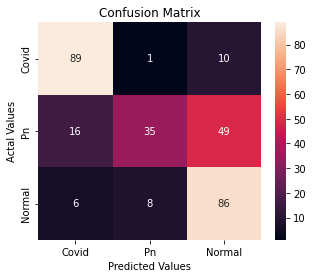

In [22]:
#Here is my confusion matrix for normal knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

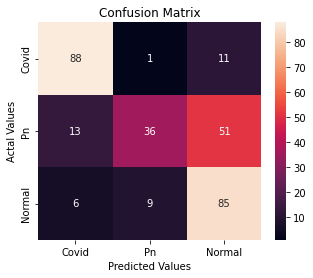

In [23]:
#Here is my confusion matrix for weighted knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfw, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
#Here is my precision, recall and accuracy values for unfiltered 32x32 data with normal knn.
print(classification_report(tests, predAll))

              precision    recall  f1-score   support

       covid       0.80      0.89      0.84       100
      normal       0.80      0.35      0.49       100
          pn       0.59      0.86      0.70       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.68       300
weighted avg       0.73      0.70      0.68       300



In [25]:
#Here is my precision, recall and accuracy values for unfiltered 32x32 data with weighted knn.
print(classification_report(tests, predAllw))

              precision    recall  f1-score   support

       covid       0.82      0.88      0.85       100
      normal       0.78      0.36      0.49       100
          pn       0.58      0.85      0.69       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.68       300
weighted avg       0.73      0.70      0.68       300



In [26]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
#The best value is 1 and the worst value is 0.

In [27]:
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.
#The best value is 1 and the worst value is 0.

In [28]:
#The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value 
#at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
#The formula for the F1 score is:

#F1 = 2 * (precision * recall) / (precision + recall)

#In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the 
#average parameter.

### Image Denoising Part


In [29]:
#Common arguments are:
#fastNlMeansDenoisingColored(img,None,h,hForColorComponents,templateWindowSize,searchWindowSize)

#h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok but 
#I get better result with 8, so I used 8)

#hForColorComponents : same as h, but for color images only. (normally same as h)

#templateWindowSize : should be odd. (recommended 7)

#searchWindowSize : should be odd. (recommended 21)


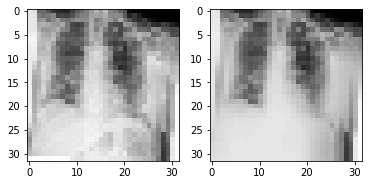

In [30]:
#example images
img = trainAll[1]
dst = cv2.fastNlMeansDenoisingColored(img,None,8,8,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
#the left side is the original data resized as (32x32) and the right side is the noice reduced version of it.

In [31]:
def noicereduction(img):
    b,g,r = cv2.split(img)           # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    # Denoising
    dst = cv2.fastNlMeansDenoisingColored(img,None,8,8,7,21)
    return dst
   

In [32]:
trainNoiceReduced = []
for i in trainAll:
    x = noicereduction(i)
    trainNoiceReduced.append(x)
    
testNoiceReduced = []
for i in testAll:
    x = noicereduction(i)
    testNoiceReduced.append(x)    
    
trainAllstrNoiceReduced = []
for i in trainAllstr:
    x=noicereduction(i[0])
    trainAllstrNoiceReduced.append([x,i[1]])    
    
testAllstrNoiceReduced = []
for i in testAllstr:
    x=noicereduction(i[0])
    testAllstrNoiceReduced.append([x,i[1]])    
    

In [33]:
for i in range(12):
    predAll2 = []
    for j in testNoiceReduced:
        x = predict_classification(trainNoiceReduced, j, i,trainAllstrNoiceReduced)
        predAll2.append(x)
    Accuracy = EvaluateAccuracy(testAllstrNoiceReduced, predAll2)
    print("The calculated Accuracy for k = ",i," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.0
The calculated Accuracy for k =  1  value is:  0.6966666666666667
The calculated Accuracy for k =  2  value is:  0.6966666666666667
The calculated Accuracy for k =  3  value is:  0.6933333333333334
The calculated Accuracy for k =  4  value is:  0.6966666666666667
The calculated Accuracy for k =  5  value is:  0.6833333333333333
The calculated Accuracy for k =  6  value is:  0.7033333333333334
The calculated Accuracy for k =  7  value is:  0.69
The calculated Accuracy for k =  8  value is:  0.69
The calculated Accuracy for k =  9  value is:  0.68
The calculated Accuracy for k =  10  value is:  0.6933333333333334
The calculated Accuracy for k =  11  value is:  0.69


In [34]:
#And here is the weighted KNN calculation
for z in range(12):
    predAll2 = []
    for j in testNoiceReduced:
        
        ordering,distances=ComputeDistances(z,trainNoiceReduced,j)
    
        # 3. get and show info for k nearest
        k_near_dists = np.zeros(z, dtype=np.float32)
        for i in range(z):
            idx = ordering[i]
            k_near_dists[i] = distances[idx]  # save dists
        wts = make_weights(z, k_near_dists)
        
        x = findClass(trainAllstrNoiceReduced, ordering, wts,z)
        predAll2.append(x)
    
    Accuracy = EvaluateAccuracy(testAllstrNoiceReduced, predAll2)
    print("The calculated Accuracy for k = ",z," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.3333333333333333
The calculated Accuracy for k =  1  value is:  0.6966666666666667
The calculated Accuracy for k =  2  value is:  0.6966666666666667
The calculated Accuracy for k =  3  value is:  0.6933333333333334
The calculated Accuracy for k =  4  value is:  0.7033333333333334
The calculated Accuracy for k =  5  value is:  0.6866666666666666
The calculated Accuracy for k =  6  value is:  0.7033333333333334
The calculated Accuracy for k =  7  value is:  0.6866666666666666
The calculated Accuracy for k =  8  value is:  0.6833333333333333
The calculated Accuracy for k =  9  value is:  0.68
The calculated Accuracy for k =  10  value is:  0.68
The calculated Accuracy for k =  11  value is:  0.69


In [35]:
#I choosed k = 6 after all for normal knn and weighted knn

In [36]:
predAll2 = [] #normal
for i in testNoiceReduced:
    x = predict_classification(trainNoiceReduced, i, 6,trainAllstrNoiceReduced)
    predAll2.append(x)
    
predAll2w = [] #weighted
for j in testNoiceReduced:
    k_near_dists = np.zeros(6, dtype=np.float32)
    ordering,distances=ComputeDistances(6,trainNoiceReduced,j)
    for i in range(6):
        idx = ordering[i]
        k_near_dists[i] = distances[idx]  # save dists
    wts = make_weights(6, k_near_dists)
    x = findClass(trainAllstrNoiceReduced, ordering, wts,6)
    predAll2w.append(x)
    

In [37]:
tests2 = [] 
for i in testAllstrNoiceReduced:
    tests2.append(i[1])

In [38]:
cm = confusion_matrix(tests2, predAll2) #normal
cm_df = pd.DataFrame(cm,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

cmw=confusion_matrix(tests2, predAll2w) #weighted
cm_dfw = pd.DataFrame(cmw,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

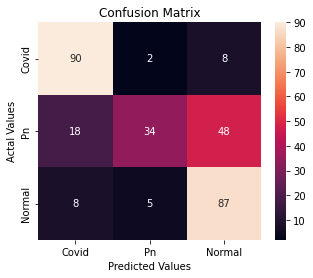

In [39]:
#Here is my confusion matrix for normal knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

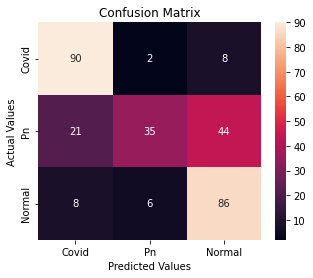

In [40]:
#Here is my confusion matrix for weighted knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfw, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [41]:
#Here is my precision, recall and accuracy values for noice reduced 32x32 data with normal knn.
print(classification_report(tests2, predAll2))

              precision    recall  f1-score   support

       covid       0.78      0.90      0.83       100
      normal       0.83      0.34      0.48       100
          pn       0.61      0.87      0.72       100

    accuracy                           0.70       300
   macro avg       0.74      0.70      0.68       300
weighted avg       0.74      0.70      0.68       300



In [42]:
#Here is my precision, recall and accuracy values for noice reduced 32x32 data with weighted knn.
print(classification_report(tests2, predAll2w))

              precision    recall  f1-score   support

       covid       0.76      0.90      0.82       100
      normal       0.81      0.35      0.49       100
          pn       0.62      0.86      0.72       100

    accuracy                           0.70       300
   macro avg       0.73      0.70      0.68       300
weighted avg       0.73      0.70      0.68       300



### Gabor Filter Part

In [43]:
#Frequency and orientation representations of the Gabor filter are similar to those of the human visual system.
#It emphasizes edge pixels.
#Pixels immediately adjacent become suppressed.
#It is directional
#Pixels farther away have less influence (Local area)

In [44]:
#Since the filter exhibits both a sine wave and bell curve nature, parameters common to both affect our filter:

#sigma σ – Standard Deviation – Property of our bell curve. Smaller values emphasize values closer to the center
#theta θ – Direction – Identifies direction of our sine wave
#lambda λ – Wavelength – Distance between peaks in our sine wave
#gamma γ – Ellipticity – Determines how elliptic our 2D bell curve is
#psi φ – Offset – Defines the phase offset of our sine wave

In [45]:
def create_gaborfilter():
    # This function is designed to produce a set of GaborFilters 
    # an even distribution of theta values equally distributed amongst pi rad / 180 degree
     
    filters = []
    num_filters = 16
    ksize = 35  # The local area to evaluate
    sigma = 4.0  # Larger Values produce more edges
    lambd = 10.0
    gamma = 0.5
    psi = 0  # Offset value - lower generates cleaner results
    for theta in np.arange(0, np.pi, np.pi / num_filters):  # Theta is the orientation for edge detection
        kern = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_64F)
        kern /= 1.0 * kern.sum()  # Brightness normalization
        filters.append(kern)
    return filters
#People suggest the sigma as 3.0 but I get the higher accuracy with 4.0

In [46]:
def apply_filter(img, filters):
# This general function is designed to apply filters to our image
     
    # First create a numpy array the same size as our input image
    newimage = np.zeros_like(img)
     
    # Starting with a blank image, we loop through the images and apply our Gabor Filter
    # On each iteration, we take the highest value (super impose), until we have the max value across all filters
    # The final image is returned
    depth = -1 # remain depth same as original image
     
    for kern in filters:  # Loop through the kernels in our GaborFilter
        image_filter = cv2.filter2D(img, depth, kern)  #Apply filter to image
         
        # Using Numpy.maximum to compare our filter and cumulative image, taking the higher value (max)
        np.maximum(newimage, image_filter, newimage)
    return newimage

In [47]:
z = create_gaborfilter()

In [48]:
#I applied filter with for loops
trainGabor = []
for i in trainAll:
    x = apply_filter(i,z)
    trainGabor.append(x)
    
testGabor = []
for i in testAll:
    x = apply_filter(i, z)
    testGabor.append(x)    
    
trainAllstrGabor = []
for i in trainAllstr:
    x=apply_filter(i[0], z)
    trainAllstrGabor.append([x,i[1]])    
    
testAllstrGabor = []
for i in testAllstr:
    x=apply_filter(i[0], z)
    testAllstrGabor.append([x,i[1]])


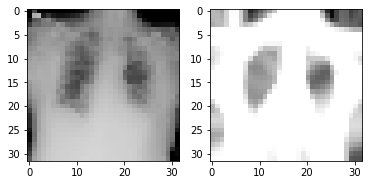

In [49]:
#example images
plt.subplot(121),plt.imshow(trainAll[0])
plt.subplot(122),plt.imshow(trainGabor[0])
plt.show()
#the left side is the original data resized as (32x32) and the right side is the gabor filtered version of it.

In [50]:
for i in range(12):
    predAll3 = []
    for j in testGabor:
        x = predict_classification(trainGabor, j, i,trainAllstrGabor)
        predAll3.append(x)
    Accuracy = EvaluateAccuracy(testAllstrGabor, predAll3)
    print("The calculated Accuracy for k = ",i," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.0
The calculated Accuracy for k =  1  value is:  0.7
The calculated Accuracy for k =  2  value is:  0.7
The calculated Accuracy for k =  3  value is:  0.7133333333333334
The calculated Accuracy for k =  4  value is:  0.7133333333333334
The calculated Accuracy for k =  5  value is:  0.7
The calculated Accuracy for k =  6  value is:  0.6933333333333334
The calculated Accuracy for k =  7  value is:  0.71
The calculated Accuracy for k =  8  value is:  0.72
The calculated Accuracy for k =  9  value is:  0.7233333333333334
The calculated Accuracy for k =  10  value is:  0.7266666666666667
The calculated Accuracy for k =  11  value is:  0.7133333333333334


In [51]:
for z in range(12):
    predAll3 = []
    for j in testGabor:
        
        ordering,distances=ComputeDistances(z,trainGabor,j)
    
        # 3. get and show info for k nearest
        k_near_dists = np.zeros(z, dtype=np.float32)
        for i in range(z):
            idx = ordering[i]
            k_near_dists[i] = distances[idx]  # save dists
        wts = make_weights(z, k_near_dists)
        
        x = findClass(trainAllstrGabor, ordering, wts,z)
        predAll3.append(x)
    
    Accuracy = EvaluateAccuracy(testAllstrGabor, predAll3)
    print("The calculated Accuracy for k = ",z," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.3333333333333333
The calculated Accuracy for k =  1  value is:  0.7
The calculated Accuracy for k =  2  value is:  0.7
The calculated Accuracy for k =  3  value is:  0.7133333333333334
The calculated Accuracy for k =  4  value is:  0.7033333333333334
The calculated Accuracy for k =  5  value is:  0.7
The calculated Accuracy for k =  6  value is:  0.6933333333333334
The calculated Accuracy for k =  7  value is:  0.71
The calculated Accuracy for k =  8  value is:  0.7133333333333334
The calculated Accuracy for k =  9  value is:  0.7233333333333334
The calculated Accuracy for k =  10  value is:  0.7233333333333334
The calculated Accuracy for k =  11  value is:  0.7233333333333334


In [52]:
#I choosed k=10 for that case

In [53]:
predAll3 = [] #normal knn
for i in testGabor:
    x = predict_classification(trainGabor, i, 10,trainAllstrGabor)
    predAll3.append(x)


predAll3w = [] #weighted knn
for j in testGabor:
    k_near_dists = np.zeros(10, dtype=np.float32)
    ordering,distances=ComputeDistances(10,trainGabor,j)
    for i in range(10):
        idx = ordering[i]
        k_near_dists[i] = distances[idx]  # save dists
    wts = make_weights(10, k_near_dists)
    x = findClass(trainAllstrGabor, ordering, wts,10)
    predAll3w.append(x)

In [54]:
tests3 = [] 
for i in testAllstrGabor:
    tests3.append(i[1])

In [55]:
cm = confusion_matrix(tests3, predAll3) #normal knn

cm_df = pd.DataFrame(cm,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

cmw=confusion_matrix(tests3, predAll3w) #weighted knn
cm_dfw = pd.DataFrame(cmw,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])


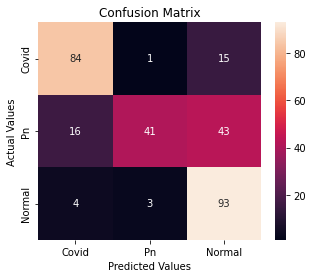

In [56]:
#Here is my confusion matrix for normal knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

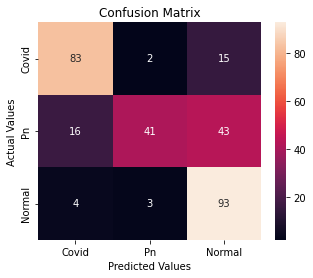

In [57]:
#Here is my confusion matrix for weighted knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfw, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [58]:
#Here is my precision, recall and accuracy values for gabor filtered 32x32 data with normal knn.
print(classification_report(tests3, predAll3))

              precision    recall  f1-score   support

       covid       0.81      0.84      0.82       100
      normal       0.91      0.41      0.57       100
          pn       0.62      0.93      0.74       100

    accuracy                           0.73       300
   macro avg       0.78      0.73      0.71       300
weighted avg       0.78      0.73      0.71       300



In [59]:
#Here is my precision, recall and accuracy values for gabor filtered 32x32 data with weighted knn.
print(classification_report(tests3, predAll3w))

              precision    recall  f1-score   support

       covid       0.81      0.83      0.82       100
      normal       0.89      0.41      0.56       100
          pn       0.62      0.93      0.74       100

    accuracy                           0.72       300
   macro avg       0.77      0.72      0.71       300
weighted avg       0.77      0.72      0.71       300



### Now on, I will make the same calcıılations with resizing images as 64x64 and keep track of the results.

In [60]:
trainAllstr = []
testAllstr = []
trainAll = []
testAll = []

In [61]:
#Here I resized the data to 64x64 and add them two list. One for normal use and one for labeled data.
for i in testCovid1:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"covid"])
for i in testPn1:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"pn"])
for i in testNorm1:
    x=cv2.resize(cv2.imread(i),(64,64))
    testAll.append(x)
    testAllstr.append([x,"normal"])
for i in trainCovid1:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"covid"])
for i in trainPn1:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"pn"])
for i in trainNorm1:
    x=cv2.resize(cv2.imread(i),(64,64))
    trainAll.append(x)
    trainAllstr.append([x,"normal"])

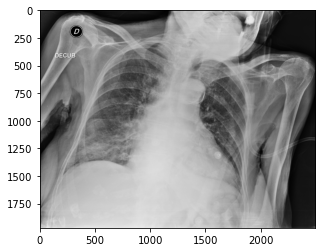

In [62]:
plt.imshow(cv2.imread(testCovid1[0])) #example of original version of first test/covid image

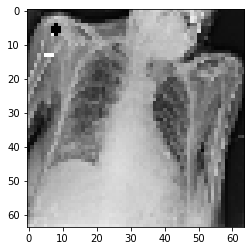

In [63]:
plt.imshow(testAll[0]) #example of resized version of the image

##### First, I will do on the original data

In [64]:
#Here, I calculate the optimal k  for unfiltered 64x64 data with regular knn.
for i in range(12):
    predAll = []
    for j in testAll:
        x = predict_classification(trainAll, j, i,trainAllstr)
        predAll.append(x)
    Accuracy = EvaluateAccuracy(testAllstr, predAll)
    print("The calculated Accuracy for k = ",i," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.0
The calculated Accuracy for k =  1  value is:  0.68
The calculated Accuracy for k =  2  value is:  0.68
The calculated Accuracy for k =  3  value is:  0.68
The calculated Accuracy for k =  4  value is:  0.71
The calculated Accuracy for k =  5  value is:  0.6833333333333333
The calculated Accuracy for k =  6  value is:  0.6933333333333334
The calculated Accuracy for k =  7  value is:  0.69
The calculated Accuracy for k =  8  value is:  0.6866666666666666
The calculated Accuracy for k =  9  value is:  0.7033333333333334
The calculated Accuracy for k =  10  value is:  0.6766666666666666
The calculated Accuracy for k =  11  value is:  0.6866666666666666


In [65]:
#And here is the weighted KNN calculation
for z in range(12):
    predAll = []
    for j in testAll:
        
        ordering,distances=ComputeDistances(z,trainAll,j)
    
        # 3. get and show info for k nearest
        k_near_dists = np.zeros(z, dtype=np.float32)
        for i in range(z):
            idx = ordering[i]
            k_near_dists[i] = distances[idx]  # save dists
        wts = make_weights(z, k_near_dists)
        
        x = findClass(trainAllstr, ordering, wts,z)
        predAll.append(x)
    
    Accuracy = EvaluateAccuracy(testAllstr, predAll)
    print("The calculated Accuracy for k = ",z," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.3333333333333333
The calculated Accuracy for k =  1  value is:  0.68
The calculated Accuracy for k =  2  value is:  0.68
The calculated Accuracy for k =  3  value is:  0.68
The calculated Accuracy for k =  4  value is:  0.7066666666666667
The calculated Accuracy for k =  5  value is:  0.69
The calculated Accuracy for k =  6  value is:  0.69
The calculated Accuracy for k =  7  value is:  0.6866666666666666
The calculated Accuracy for k =  8  value is:  0.69
The calculated Accuracy for k =  9  value is:  0.6966666666666667
The calculated Accuracy for k =  10  value is:  0.6833333333333333
The calculated Accuracy for k =  11  value is:  0.6866666666666666


In [66]:
#As you see, the most precious value of k is 4. So, I will continue with 4. 


In [67]:
#Here, I made the prediction according to k=4 with normal knn to use in confusion matrix etc.
predAll = []
for j in testAll:
    x = predict_classification(trainAll, j, 4,trainAllstr)
    predAll.append(x)


#Here, I made the prediction according to k=4 with weighted knn to use in confusion matrix etc.
predAllw = []
for j in testAll:
    k_near_dists = np.zeros(4, dtype=np.float32)
    ordering,distances=ComputeDistances(4,trainAll,j)
    for i in range(4):
        idx = ordering[i]
        k_near_dists[i] = distances[idx]  # save dists
    wts = make_weights(4, k_near_dists)
    x = findClass(trainAllstr, ordering, wts,4)
    predAllw.append(x)

In [68]:
#I collected the labeles according to queue.
tests = [] 
for i in testAllstr:
    tests.append(i[1])

In [69]:
cm = confusion_matrix(tests, predAll) #normal knn

cm_df = pd.DataFrame(cm,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

cmw=confusion_matrix(tests, predAllw) #weighted knn
cm_dfw = pd.DataFrame(cmw,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

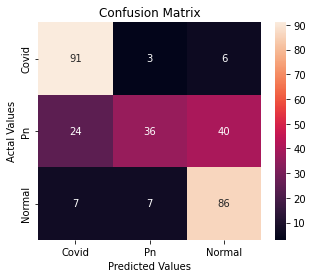

In [70]:
#Here is my confusion matrix for normal knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

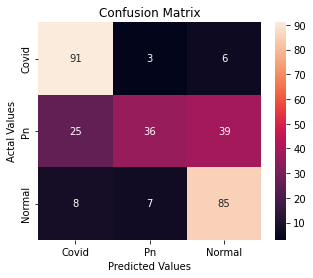

In [71]:
#Here is my confusion matrix for weighted knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfw, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [72]:
#Here is my precision, recall and accuracy values for unfiltered 32x32 data with normal knn.
print(classification_report(tests, predAll))

              precision    recall  f1-score   support

       covid       0.75      0.91      0.82       100
      normal       0.78      0.36      0.49       100
          pn       0.65      0.86      0.74       100

    accuracy                           0.71       300
   macro avg       0.73      0.71      0.68       300
weighted avg       0.73      0.71      0.68       300



In [73]:
#Here is my precision, recall and accuracy values for unfiltered 32x32 data with weighted knn.
print(classification_report(tests, predAllw))

              precision    recall  f1-score   support

       covid       0.73      0.91      0.81       100
      normal       0.78      0.36      0.49       100
          pn       0.65      0.85      0.74       100

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.68       300
weighted avg       0.72      0.71      0.68       300



##### I will continue with noice reduced filter

In [74]:
trainNoiceReduced = []
for i in trainAll:
    x = noicereduction(i)
    trainNoiceReduced.append(x)
    
testNoiceReduced = []
for i in testAll:
    x = noicereduction(i)
    testNoiceReduced.append(x)    
    
trainAllstrNoiceReduced = []
for i in trainAllstr:
    x=noicereduction(i[0])
    trainAllstrNoiceReduced.append([x,i[1]])    
    
testAllstrNoiceReduced = []
for i in testAllstr:
    x=noicereduction(i[0])
    testAllstrNoiceReduced.append([x,i[1]])    
    

In [75]:
for i in range(12):
    predAll2 = []
    for j in testNoiceReduced:
        x = predict_classification(trainNoiceReduced, j, i,trainAllstrNoiceReduced)
        predAll2.append(x)
    Accuracy = EvaluateAccuracy(testAllstrNoiceReduced, predAll2)
    print("The calculated Accuracy for k = ",i," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.0
The calculated Accuracy for k =  1  value is:  0.6966666666666667
The calculated Accuracy for k =  2  value is:  0.6966666666666667
The calculated Accuracy for k =  3  value is:  0.7033333333333334
The calculated Accuracy for k =  4  value is:  0.72
The calculated Accuracy for k =  5  value is:  0.7066666666666667
The calculated Accuracy for k =  6  value is:  0.7133333333333334
The calculated Accuracy for k =  7  value is:  0.7166666666666667
The calculated Accuracy for k =  8  value is:  0.72
The calculated Accuracy for k =  9  value is:  0.7066666666666667
The calculated Accuracy for k =  10  value is:  0.7
The calculated Accuracy for k =  11  value is:  0.68


In [76]:
#And here is the weighted KNN calculation
for z in range(12):
    predAll2 = []
    for j in testNoiceReduced:
        
        ordering,distances=ComputeDistances(z,trainNoiceReduced,j)
    
        # 3. get and show info for k nearest
        k_near_dists = np.zeros(z, dtype=np.float32)
        for i in range(z):
            idx = ordering[i]
            k_near_dists[i] = distances[idx]  # save dists
        wts = make_weights(z, k_near_dists)
        
        x = findClass(trainAllstrNoiceReduced, ordering, wts,z)
        predAll2.append(x)
    
    Accuracy = EvaluateAccuracy(testAllstrNoiceReduced, predAll2)
    print("The calculated Accuracy for k = ",z," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.3333333333333333
The calculated Accuracy for k =  1  value is:  0.6966666666666667
The calculated Accuracy for k =  2  value is:  0.6966666666666667
The calculated Accuracy for k =  3  value is:  0.7033333333333334
The calculated Accuracy for k =  4  value is:  0.72
The calculated Accuracy for k =  5  value is:  0.7033333333333334
The calculated Accuracy for k =  6  value is:  0.7133333333333334
The calculated Accuracy for k =  7  value is:  0.7133333333333334
The calculated Accuracy for k =  8  value is:  0.73
The calculated Accuracy for k =  9  value is:  0.7066666666666667
The calculated Accuracy for k =  10  value is:  0.7033333333333334
The calculated Accuracy for k =  11  value is:  0.6866666666666666


In [77]:
#I choosed k = 8 after all for normal knn and weighted knn

In [78]:
#I collected the predictions
predAll2 = []
for i in testNoiceReduced:
    x = predict_classification(trainNoiceReduced, i, 8,trainAllstrNoiceReduced)
    predAll2.append(x)
    
predAll2w = [] #weighted
for j in testNoiceReduced:
    k_near_dists = np.zeros(8, dtype=np.float32)
    ordering,distances=ComputeDistances(8,trainNoiceReduced,j)
    for i in range(8):
        idx = ordering[i]
        k_near_dists[i] = distances[idx]  # save dists
    wts = make_weights(8, k_near_dists)
    x = findClass(trainAllstrNoiceReduced, ordering, wts,8)
    predAll2w.append(x)

In [79]:
tests2 = [] 
for i in testAllstrNoiceReduced:
    tests2.append(i[1])

In [80]:
cm = confusion_matrix(tests2, predAll2) #normal knn

cm_df = pd.DataFrame(cm,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])
cmw=confusion_matrix(tests2, predAll2w) #weighted knn
cm_dfw = pd.DataFrame(cmw,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

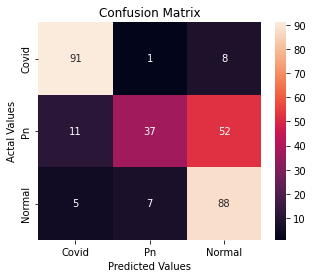

In [81]:
#Here is my confusion matrix for normal knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

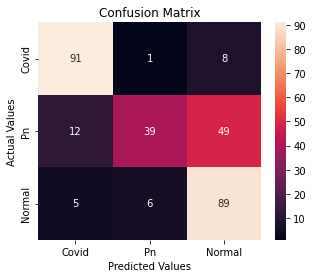

In [82]:
#Here is my confusion matrix for weighted knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfw, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [83]:
#Here is my precision, recall and accuracy values for noice reduced 64z64 data with normal knn.
print(classification_report(tests2, predAll2))

              precision    recall  f1-score   support

       covid       0.85      0.91      0.88       100
      normal       0.82      0.37      0.51       100
          pn       0.59      0.88      0.71       100

    accuracy                           0.72       300
   macro avg       0.76      0.72      0.70       300
weighted avg       0.76      0.72      0.70       300



In [84]:
#Here is my precision, recall and accuracy values for noice reduced 64x64 data with weighted knn.
print(classification_report(tests2, predAll2w))

              precision    recall  f1-score   support

       covid       0.84      0.91      0.87       100
      normal       0.85      0.39      0.53       100
          pn       0.61      0.89      0.72       100

    accuracy                           0.73       300
   macro avg       0.77      0.73      0.71       300
weighted avg       0.77      0.73      0.71       300



##### And lastly, the Gabor filter part.

In [85]:
z = create_gaborfilter()

In [86]:
trainGabor = []
for i in trainAll:
    x = apply_filter(i,z)
    trainGabor.append(x)
    
testGabor = []
for i in testAll:
    x = apply_filter(i, z)
    testGabor.append(x)    
    
trainAllstrGabor = []
for i in trainAllstr:
    x=apply_filter(i[0], z)
    trainAllstrGabor.append([x,i[1]])    
    
testAllstrGabor = []
for i in testAllstr:
    x=apply_filter(i[0], z)
    testAllstrGabor.append([x,i[1]])    
        

In [87]:
for i in range(12):
    predAll3 = []
    for j in testGabor:
        x = predict_classification(trainGabor, j, i,trainAllstrGabor)
        predAll3.append(x)
    Accuracy = EvaluateAccuracy(testAllstrGabor, predAll3)
    print("The calculated Accuracy for k = ",i," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.0
The calculated Accuracy for k =  1  value is:  0.7366666666666667
The calculated Accuracy for k =  2  value is:  0.7366666666666667
The calculated Accuracy for k =  3  value is:  0.75
The calculated Accuracy for k =  4  value is:  0.7533333333333333
The calculated Accuracy for k =  5  value is:  0.7633333333333333
The calculated Accuracy for k =  6  value is:  0.75
The calculated Accuracy for k =  7  value is:  0.7466666666666667
The calculated Accuracy for k =  8  value is:  0.7566666666666667
The calculated Accuracy for k =  9  value is:  0.74
The calculated Accuracy for k =  10  value is:  0.7466666666666667
The calculated Accuracy for k =  11  value is:  0.7166666666666667


In [88]:
for z in range(12):
    predAll3 = []
    for j in testGabor:
        
        ordering,distances=ComputeDistances(z,trainGabor,j)
    
        # 3. get and show info for k nearest
        k_near_dists = np.zeros(z, dtype=np.float32)
        for i in range(z):
            idx = ordering[i]
            k_near_dists[i] = distances[idx]  # save dists
        wts = make_weights(z, k_near_dists)
        
        x = findClass(trainAllstrGabor, ordering, wts,z)
        predAll3.append(x)
    
    Accuracy = EvaluateAccuracy(testAllstrGabor, predAll3)
    print("The calculated Accuracy for k = ",z," value is: ", Accuracy)

The calculated Accuracy for k =  0  value is:  0.3333333333333333
The calculated Accuracy for k =  1  value is:  0.7366666666666667
The calculated Accuracy for k =  2  value is:  0.7366666666666667
The calculated Accuracy for k =  3  value is:  0.75
The calculated Accuracy for k =  4  value is:  0.75
The calculated Accuracy for k =  5  value is:  0.7633333333333333
The calculated Accuracy for k =  6  value is:  0.75
The calculated Accuracy for k =  7  value is:  0.7466666666666667
The calculated Accuracy for k =  8  value is:  0.75
The calculated Accuracy for k =  9  value is:  0.7366666666666667
The calculated Accuracy for k =  10  value is:  0.74
The calculated Accuracy for k =  11  value is:  0.72


In [89]:
#I choosed k=5 for that case

In [90]:
predAll3 = [] #normal knn
for i in testGabor:
    x = predict_classification(trainGabor, i, 10,trainAllstrGabor)
    predAll3.append(x)

predAll3w = [] #weighted knn
for j in testGabor:
    k_near_dists = np.zeros(10, dtype=np.float32)
    ordering,distances=ComputeDistances(10,trainGabor,j)
    for i in range(10):
        idx = ordering[i]
        k_near_dists[i] = distances[idx]  # save dists
    wts = make_weights(10, k_near_dists)
    x = findClass(trainAllstrGabor, ordering, wts,10)
    predAll3w.append(x)

In [91]:
tests3 = [] 
for i in testAllstrGabor:
    tests3.append(i[1])

In [92]:
cm = confusion_matrix(tests3, predAll3) #normal knn
cm_df = pd.DataFrame(cm,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])

cmw=confusion_matrix(tests3, predAll3w) #weighted knn
cm_dfw = pd.DataFrame(cmw,
                     index = ['Covid','Pn','Normal'], 
                     columns = ['Covid','Pn','Normal'])


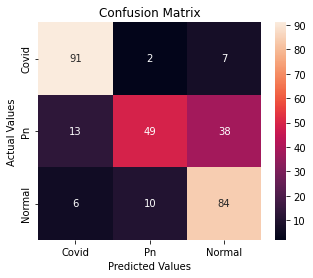

In [93]:
#Here is my confusion matrix for normal knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

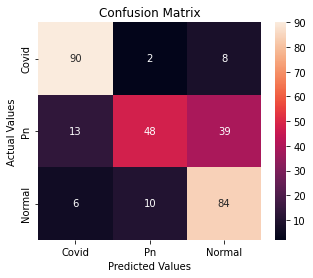

In [94]:
#Here is my confusion matrix for weighted knn
plt.figure(figsize=(5,4))
sns.heatmap(cm_dfw, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [95]:
#Here is my precision, recall and accuracy values for gabor filtered 64x64 data with normal knn.
print(classification_report(tests3, predAll3))

              precision    recall  f1-score   support

       covid       0.83      0.91      0.87       100
      normal       0.80      0.49      0.61       100
          pn       0.65      0.84      0.73       100

    accuracy                           0.75       300
   macro avg       0.76      0.75      0.74       300
weighted avg       0.76      0.75      0.74       300



In [96]:
#Here is my precision, recall and accuracy values for gabor filtered 64x64 data with weighted knn.
print(classification_report(tests3, predAll3w))

              precision    recall  f1-score   support

       covid       0.83      0.90      0.86       100
      normal       0.80      0.48      0.60       100
          pn       0.64      0.84      0.73       100

    accuracy                           0.74       300
   macro avg       0.76      0.74      0.73       300
weighted avg       0.76      0.74      0.73       300



# CONCLUSİON

In this experiment, I get an dataset with 3000 images and an test set with 300 images. I wrote a normal knn and a weighted knn algorithm. Using different features (noice reducing and gabor filter), different k values and different sizes, I observed the difference of their accuracies, precisions and recalls. 
There is my results:

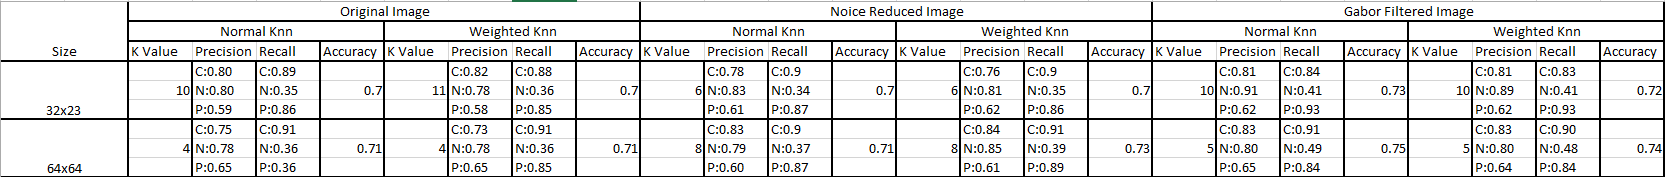

On my result table, I used the optimal k value for each case and also while finding them, I saw that while k is growing, the executing time also grows.

Machine learning algorithms such as k-NN, SVMs, and even Convolutional Neural Networks require all images in a dataset to have a fixed feature vector size.In the case of images, this requirement implies that our images must be preprocessed and scaled to have identical widths and heights. I used 32x32 and 64x64 sizes for that experiment and considering my results, I can easily say that when I increase the size, accuracy also increases because the image becomes more detailed.But also it makes data  bigger  and it takes more time.


KNN modeling does not include training period as the data itself is a model which will be the reference for future prediction and because of this it is very time efficient in term of improvising for a random modeling on the available data but it does not work well with large datasets as calculating distances between each data instance would be very costly. 


I used two parameters for that experiment. One is Gabor as texture feature and one is image noice reduction. 

My image noice reduction algorithm has different parameters like h as deciding filter strength. I didn't see too mıch difference between the others but filter strength made the difference. When I give a higher value, it provided more blurred image. The website that I take the code suggests that h value as 10 but I get higher accuracy with 8 and thus, I used 8. I think 10 makes blur to important shapes.

My Gabor filter also has different parameters like sigma(Larger Values produce more edges), theta, lambd, gamma, psi( Offset value - lower generates cleaner results). I tried different sigma values and when I give higher sigma values, it becomes more brighter and undetailed. The website that I take the code suggests the sigma as 3.0 but I get the higher accuracy with 4.0. I also tried 5.0 but it became undetailed and had low accuricy.

The next thing is, I wrote the knn and weigted knn method's myself and while I was searching about weighted knn, I saw that people use different methods to calculate the weights. In my method, I did the most used method. I wrote the distances as 1/x and used them as weights.

And the last part I want to talk about is, like many other classifiers, k-NN classifier is noise-sensitive. Its accuracy highly depends on the quality of the training data. Noise and mislabeled data, as well as outliers and overlaps between data regions of different classes, lead to less accurate classification. 

My datasets lots of noisy and improper members like;

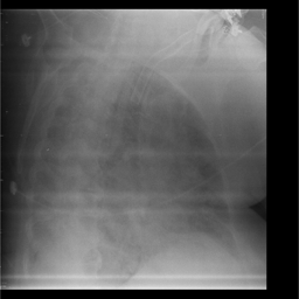

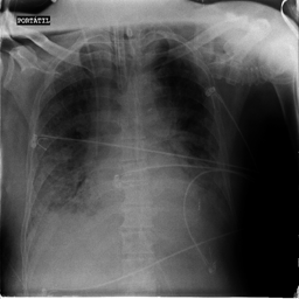

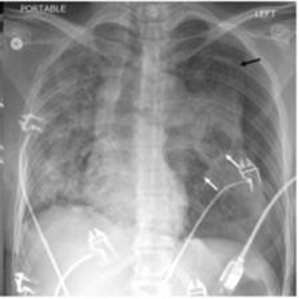

These may lead inaccurate predictions. The same is true for test data.

In [97]:
predAll = []
for j in testAll:
    x = predict_classification(trainAll, j, 4,trainAllstr)
    predAll.append(x)

In [98]:
for i in range(20,40):
    print([testAllstr[i][1], predAll[i]])

['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'pn']
['covid', 'pn']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'covid']
['covid', 'normal']


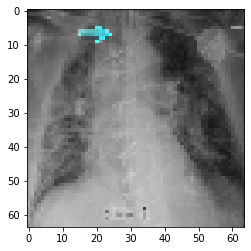

In [99]:
plt.imshow(testAll[27])

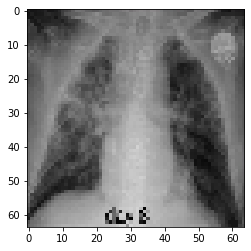

In [100]:
plt.imshow(testAll[28])

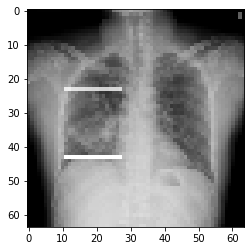

In [101]:
plt.imshow(testAll[39])

As you see, these 3 are the missclassified test cases. They all noisy enough to missclassify. It shows the importance of using clean data.